![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights

Before you explore the data, write down a short list of what you expect to see in the data: the distribution of key variables, the relationships between important pairs of them, and so on. Such a list is essentially a prediction based on your current understanding of the business.

Now analyze the data. Make plots, do summaries, whatever is needed to see if it matches your expectations.

Is there anything that doesn’t match? Anything that makes you go “That’s odd” or “That doesn’t make any sense.”?

Zoom in and try to understand what in your business is making that weird thing show up in the data like that. This is the critical step.

You may have just found an insight into the business and increased your understanding


## The data analysis checklist

This checklist can be used as a guide during the process of a data analysis, or as a way to evaluate the quality of a reported data analysis.

### Answering the first questions

1. Did you define the metric for success before beginning?
2. Did you understand the context for the question and business application?
3. Did you consider whether the question could be answered with the available data?

### Cleaning the data

1. Did you identify the missing data?
2. Is each variable one column?
3. Do different data types appear in each table?
4. Did you try to identify any errors or miscoding of variables?
5. Did you check for outliers?

### Exploratory analysis

1. Did you make univariate plots (histogram, distplot, boxplot)?
2. Did you consider correlations between variables (scatterplot, jointplot, kde plot, correlation matrix)?
3. Did you check the units of all data points to make sure they are in the right range?

### Presentations

1. Did you lead with a brief, understandable to everyone of your problem?
2. Did you explain the data, describe the question of interest?
3. Did you make sure all legends and axes were legible from the back of the room?

## Dataset - Online Retailes Purchase

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php) has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".


### Step 1 - Checking the data

**Import tools set**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import data**

In [0]:
link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
link = pd.read_csv(link, encoding = 'latin1')
# Note: set param encoding = 'latin1'
# Your code here

In [3]:
# Print out First 5 rows from dataframe
# Your code here
link.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [94]:
link.info()# Print out brief info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
InvoiceNo      530104 non-null object
StockCode      530104 non-null object
Description    530104 non-null object
Quantity       530103 non-null float64
InvoiceDate    530104 non-null datetime64[ns]
UnitPrice      530104 non-null object
CustomerID     397884 non-null float64
Country        530104 non-null object
Hour           530104 non-null int64
Month          530104 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 64.5+ MB


### Step 2 - Cleaning the data

Few of useful data cleaning functions:

* `s.astype('category')` # This will convert the datatype of the series to float *Please note that "s" here is a Pandas Series

* `s.replace(1,'one')` # This will replace all values equal to 1 with 'one'

* `s.replace([1,3],['one','three'])` # This will replace all 1 with 'one' and 3 with 'three'

* `data.rename(columns=lambda x: x + 1)` # Mass renaming of columns

* `data.rename(columns={'oldname': 'new name'})` # Selective renaming

* `data.set_index('column_one')` #  This will change the index

* `data.rename(index=lambda x: x + 1)` # Mass renaming of index

* `data.dropna()` # Remove missing values

* `data.fillna(x)` #  This will replaces all null values with x

* `s.fillna(s.mean())` # This will replace all null values with the mean (mean can be replaced with almost any function from the below section) :

* `data.corr()` # This will return the correlation between columns in a DataFrame

* `data.count()` # This will return the number of non-null values in each DataFrame column

* `data.max()` # This will return the highest value in each column

* `data.min()` # This will return the lowest value in each column

* `data.median()` # This will return the median of each column

* `data.std()` # This will returns the standard deviation of each column


**Check for NaN values**

In [5]:
link.isnull().sum().sort_values()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Description      1454
CustomerID     135080
dtype: int64

**Examine few examples of NaN values**

In [8]:
link[link['Description'].isnull()].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
270602,560578,22034,NaN,12,2011-07-19 15:12:00,0.0,NaN,United Kingdom
170532,551318,21898,NaN,60,2011-04-27 15:25:00,0.0,NaN,United Kingdom
166619,550943,21316,NaN,-5,2011-04-21 15:51:00,0.0,NaN,United Kingdom
469110,576580,22034,NaN,-5,2011-11-15 14:15:00,0.0,NaN,United Kingdom
373677,569347,85086A,NaN,-6,2011-10-03 14:38:00,0.0,NaN,United Kingdom


**Exclude negative Quatity entries**

In [0]:
link= link[link.Quantity > '0']

**Exclude negative Price entries**

In [41]:
link = link[link.UnitPrice > '0']
link.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [58]:
link.groupby(by=['CustomerID','Country'])['InvoiceNo'].count().head()
top = link.sort_values(by = ['InvoiceNo']).head(5)
top[top['Country']=='United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,536365,12/1/10 8:26,536365,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,536365,12/1/10 8:26,536365,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,536365,12/1/10 8:26,536365,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,536365,12/1/10 8:26,536365,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,536365,12/1/10 8:26,536365,17850.0,United Kingdom


**The customer with the highest money spent on purchases comes from Netherlands**

In [95]:
link['Quantity'] = pd.to_numeric(link['Quantity'], errors='coerce')
link['Spent'] = link['Quantity'] * link['UnitPrice']


TypeError: ignored

**On which year had the highest sales?**

In [81]:
link['InvoiceDate'] = pd.to_datetime(link.InvoiceDate, format='%m/%d/%y %H:%M')


0         2010
1         2010
2         2010
3         2010
4         2010
5         2010
6         2010
7         2010
8         2010
9         2010
10        2010
11        2010
12        2010
13        2010
14        2010
15        2010
16        2010
17        2010
18        2010
19        2010
20        2010
21        2010
22        2010
23        2010
24        2010
25        2010
26        2010
27        2010
28        2010
29        2010
          ... 
541879    2011
541880    2011
541881    2011
541882    2011
541883    2011
541884    2011
541885    2011
541886    2011
541887    2011
541888    2011
541889    2011
541890    2011
541891    2011
541892    2011
541893    2011
541894    2011
541895    2011
541896    2011
541897    2011
541898    2011
541899    2011
541900    2011
541901    2011
541902    2011
541903    2011
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 530104, dtype: int64

In [83]:
link['Hour'] = link['InvoiceDate'].dt.hour
link.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      530104 non-null object
StockCode      530104 non-null object
Description    530104 non-null object
Quantity       530104 non-null object
InvoiceDate    530104 non-null datetime64[ns]
UnitPrice      530104 non-null object
CustomerID     397884 non-null float64
Country        530104 non-null object
Hour           530104 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 40.4+ MB


**How many orders (per hour)?**

In [85]:
link.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()


[6]        1
[7]       29
[8]      566
[9]     1484
[10]    2361
[11]    2395
[12]    3219
[13]    2753
[14]    2457
[15]    2336
[16]    1335
[17]     667
[18]     192
[19]     146
[20]      18
Name: Hour, dtype: int64

**Make a plot about number of orders per hour**

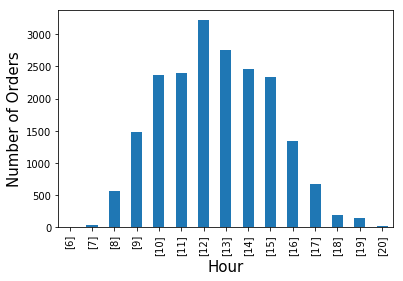

In [86]:
ax = link.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot('bar')
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.show()

**How many orders (per month)?**

In [90]:
link['Month'] = link['InvoiceDate'].dt.month
link.groupby('InvoiceNo')['Month'].unique().value_counts().iloc[:-1].sort_index()

[2]     1100
[3]     1454
[4]     1246
[5]     1681
[6]     1533
[7]     1475
[8]     1361
[9]     1837
[10]    2040
[11]    2769
[12]    2378
Name: Month, dtype: int64

**Make a plot about number of orders per month**

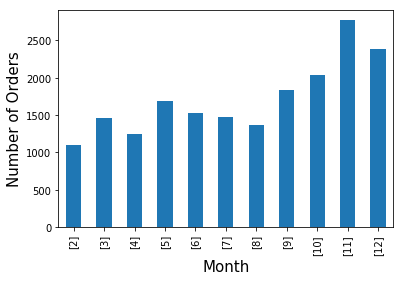

In [91]:
ax = link.groupby('InvoiceNo')['Month'].unique().value_counts().iloc[:-1].sort_index().plot('bar')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
plt.show()

**Top 10 items most sales**

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [0]:
# Your code here

# What can you tell about this?

### You are awesome!!